<img src="Logo-ikiam-.png" width=300 height=240 />

<h1><center>TAREA 2 - Parcial 2</center></h1>

<h2><center>GBI6-2021II: BIOINFORMÁTICA</center></h2>

**<h3><center>Freire Torres, Camila Micaela</center></h3>**

**<h4><center>Fecha de entrega: 16-02-2022</center></h4>**

## <font color='brown'>Ejercicio 1</font>

Basado en las sesiones de **Visualización de datos** y **Expresiones resulares**. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

1. Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
2. Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). 
3. Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  **Ubicación Geográfica de Países - Google Developer**. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA. 
4. En su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

*Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:*

- En el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
- La figura tiene etiquetas adecuadas en los ejes de la visualización. 
- Se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [236]:
# Primero se activa el paquete 're' y se abre el archivo descargado con el comando with open, donde
# with se usa para facilitar la apertura y cierre de archivos en python

# Cabe mencionar que se ha estandarizado los nombres de todos los paises, y se ha modificado el archivo
# para que estos coincidan con los nombres provistos en el archivo coordenadas.csv

import re

with open('pubmed-spiderveno-set.txt') as f:
    texto1 = f.read()
    #print (texto1)

In [237]:
# En la línea de AD existe separacion en sus propios datos en un patro de salto de línea 
# seguido por 6 espacios y posteriormente la información que continua la línea AD (\n\s{6}), por
# lo mismo, se borra este patron y se lo reemplaza por un solo espacio para de esta manera unir las 
# líneas diferentes:

texto2 = re.sub(r'\n\s{6}', ' ', texto1)

# Se puede usar print para verificar la informaciñón obtenida del archivo, y de esta manera poder 
# seleccionar el patron a emplear, en este caso se lo ha dejado como comentario para facilitar la 
# lectura del resto del codigo

#print (texto2) 

In [238]:
### A continuación se realiza la busqueda de los patrones específicos. 

## Se ha dividido cada patron para obtener resultados con mejor presentación y más prescisos
## Asimismo, se utiliza flags=re.M para leer el texto como multilínes y qie identifique 
## la línea que comience con AD

# El primero se ha tomado como patron todos los paises que estén escritos de la siguiente manera:
# [espacio][Código postal], País. palabra
# Cabe destacar que los codigos postales tienen desde 4 a 7 cifras, asimismo, solo se tomó en
#cuenta a quellos paises que tienen de 4 a 10 letras. Se utilizó [A-Z]{1}, para indicar que el 
# patrón alfanumérico comienza con una letra en mayuscula de la A a la Z. 

texto3 = re.findall(r'^AD |\s\d{4,7}\,\s([A-Z]{1}\w{4,10}\.\s\w)', texto2, flags=re.M)

# Para el siguiente patrón, se tomó palabra, País. [salto de línea] 
# y se utilizaron las restricciones mencionadas anteriormente. 

texto4 = re.findall(r'^AD | \w*\,\s([A-Z]{1}\w{4,10}\.\n)', texto2, flags=re.M)

# En el siguiente, se tomó: letra. País. [salto de línea]: 

texto5 = re.findall(r'^AD | \w\.\s([A-Z]{1}\w*\.\n)', texto2, flags=re.M)

# En el siguiente, se tomó: [espacio]palabras. País. [correo electrónico]: 
  
texto6 = re.findall(r'^AD | \s(\w*\.)\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', texto2, flags=re.M)

# En el siguiente, se tomó: palabras. País SegundoNombre.\n: 

texto7 = re.findall(r'^AD | \w*\,\s([A-Z]\w*\s[A-Z]\w*\.\n)', texto2, flags=re.M)

# En el siguiente, se tomó: [espacio]CodigoPostal, País. palabra: 

texto8 = re.findall(r'^AD |\s\d{4,7}\,\s([A-Z]{3}\.\s\w)', texto2, flags=re.M)

# En el siguiente, se tomó: palabra, USA.\n:

texto9 = re.findall(r'^AD | \w*\,\s([A-Z]{3}\.\n)', texto2, flags=re.M)

# En el siguiente, se tomó: [espacio][Código postal], País.\n:

texto10 = re.findall(r'^AD |\s\d{4,7}\,\s([A-Z]{1}\w{4,10}\.\n)', texto2, flags=re.M)

#print (texto3)

#print (texto4)

#print (texto5)

#print (texto6)

#print (texto7)

#print (texto8)

#print (texto9)

#print (texto10)

# Cabe destacar que se ha tomado en cuenta lo maximo de posibilidades. 

In [239]:
# Posteriormente, se genera una lista con elementos unicos de cada una de las listas generadas 
# anteriormente con las expresiones regulares.

## Sin embargo, se excluirá el texto8, por poseer casos especiales como USA. J

unique_texto1 = list(set(texto3))

unique_texto2 = list(set(texto4))

unique_texto3 = list(set(texto5))

unique_texto4 = list(set(texto6))

unique_texto5 = list(set(texto7))

unique_texto7 = list(set(texto9))

unique_texto8 = list(set(texto10))

#print (unique_texto1)

#print (unique_texto2)

#print (unique_texto3)

#print (unique_texto4)

#print (unique_texto5)

#print (unique_texto7)

#print (unique_texto8)


In [240]:
## Como se pudo observar gracias a print, en el anterior punto. Existe un elemento extra al inicio
# de cada lista -> '', por lo que se procede a borrarlo, para que el mismo no genere problemas
# con lo que resta del código. Se emplea lista.pop[posición]

unique_texto1.pop(0)
unique_texto2.pop(0)
unique_texto3.pop(0)
unique_texto4.pop(0)
unique_texto5.pop(0)
unique_texto7.pop(0)
unique_texto8.pop(0)

#print(unique_texto1)
#print(unique_texto2)
#print(unique_texto3)
#print(unique_texto4)
#print(unique_texto5)
#print(unique_texto7)
print(unique_texto8)

['France.\n', 'Chile.\n', 'Spain.\n', 'Belgium.\n', 'Korea.\n', 'Thailand.\n', 'India.\n', 'Mexico.\n', 'Uruguay.\n', 'Ukraine.\n', 'Germany.\n', 'Switzerland.\n', 'Colombia.\n', 'Hungary.\n', 'Romania.\n', 'Tunisia.\n', 'Singapore.\n', 'Argentina.\n', 'China.\n', 'Russia.\n', 'Pakistan.\n', 'Australia.\n', 'Austria.\n', 'Taiwan.\n']


In [241]:
# Posteriormente, se convierte las listas a una cadena de texto, para extraer unicamente los 
# nombres de los paises, ya que como se puede verificar, algunos paises incluyen otros simbolos
# como puntos, comas, \n, etc. 

#NOTA: No se ha tomado en cuenta el unique_texto5 ni unique_texto7 

sincoma1 = "".join([str(_) for _ in unique_texto1])
sincoma2 = "".join([str(_) for _ in unique_texto2])
sincoma3 = "".join([str(_) for _ in unique_texto3])
sincoma4 = "".join([str(_) for _ in unique_texto4])
sincoma8 = "".join([str(_) for _ in unique_texto8])

# Para los patrones, se requiere extraer unicamente el nombre de los paises, por lo que 
# para el primero, como se tienen paises de manera LChina, se debe expecificar que solo se 
# desea extraer China, por lo mismo se usa el patron Letra mayuscula seguido de una letra minuscula
# [A-Z]{1}[a-z]{1}, seguido de un patrón alfa numérico \w*

texto_unico1_1 = re.findall(r'([A-Z]{1}[a-z]{1}\w*)', sincoma1)

# Las demás solo tiene en patrol alfanumérico

texto_unico1_2 = re.findall(r'\w*', sincoma2)
texto_unico1_3 = re.findall(r'\w*', sincoma3)
texto_unico1_4 = re.findall(r'\w*', sincoma4)
texto_unico1_8 = re.findall(r'\w*', sincoma8)

# Se vuelve a generar listas con elementos unicos

texto_unico1 = list(set(texto_unico1_1))
texto_unico2 = list(set(texto_unico1_2))
texto_unico3 = list(set(texto_unico1_3))
texto_unico4 = list(set(texto_unico1_4))
texto_unico8 = list(set(texto_unico1_8))

#print (texto_unico1)
#print (texto_unico2)
#print (texto_unico3)
#print (texto_unico4)
#print (texto_unico8)


In [242]:
# Para unique_texto5, primero se lo convierte en una cadena de texto,  posteriormente se elimina
# el punto y el salto de línea y se los reemplaza por una coma y un espacio y se nombra a este 
# como textosub1_5

sincoma5 = "".join([str(_) for _ in unique_texto5])
print (sincoma5)
textosub1_5 = re.sub(r'\.\n', ', ', sincoma5)
print (textosub1_5)

# Ahora a textosub1_5 se le extrae unicamente el nombre del pais, el cual esta compiesto por 
# PrimerNombre SegundoNombre por lo que se utiliza el siguiente patron:

texto_unico1_5 = re.findall(r'([A-Z]{1}\w{3,5}\s\w*)', textosub1_5)
print (texto_unico1_5)

# Se renombra la anterior lista creada como texto_unico5, al igual que las demás.

texto_unico5 = texto_unico1_5

print (texto_unico5)


Saudi Arabia.
The Netherlands.
New Zealand.
South Africa.
Hong Kong.
Costa Rica.
United Kingdom.
Czech Republic.

Saudi Arabia, The Netherlands, New Zealand, South Africa, Hong Kong, Costa Rica, United Kingdom, Czech Republic, 
['Saudi Arabia', 'South Africa', 'Hong Kong', 'Costa Rica', 'United Kingdom', 'Czech Republic']
['Saudi Arabia', 'South Africa', 'Hong Kong', 'Costa Rica', 'United Kingdom', 'Czech Republic']


In [243]:
# Por otra parte, para el texto8, primero a este se lo convierte en una cadena de texto, 
# y se la nombra texto8_1

texto8_1 = "".join([str(_) for _ in texto8])

# En este se extrae específicamente la palabra USA

texto8_2 = re.findall(r'USA', texto8_1)

# De esta, se genera una nueva lista con los elementos unicos. 

texto_unico6 = list(set(texto8_2))

#print(texto_unico6)

# Finalmente, para unique_texto7, se lo convierte en una cadena de texto, de la cual se busca el 
# patrón específico y se genera una lista con elementos unicos.

sincoma7 = "".join([str(_) for _ in unique_texto7])

texto_unico1_7 = re.findall(r'\w*', sincoma7)

texto_unico7 = list(set(texto_unico1_7))

#print (texto_unico7)

In [244]:
# Se elimina el elemento 0 que corresponde a '', y no se toma en cuenta a texto_unico5 ni 
#texto_unico6, ya que los mismos no poseen el elemento mencionado

texto_unico1.pop(0)
texto_unico2.pop(0)
texto_unico3.pop(0)
texto_unico4.pop(0)
texto_unico7.pop(0)
texto_unico8.pop(0)

#print(texto_unico1)
#print(texto_unico2)
#print(texto_unico3)
#print(texto_unico4)
#print(texto_unico7)
#print(texto_unico8)


''

In [245]:
#Se unen todas las listas creadas con .extend y finalmente se imprime para comprobar
texto_unico1.extend(texto_unico2)

In [246]:
texto_unico1.extend(texto_unico3)

In [247]:
texto_unico1.extend(texto_unico4)

In [248]:
texto_unico1.extend(texto_unico5)

In [249]:
texto_unico1.extend(texto_unico6)

In [250]:
texto_unico1.extend(texto_unico7)

In [251]:
texto_unico1.extend(texto_unico8)
print(texto_unico1)

['India', 'Argentina', 'Denmark', 'France', 'China', 'Switzerland', 'Belgium', 'Ukraine', 'Spain', 'Romania', 'Germany', 'Hungary', 'Korea', 'Austria', 'Chile', 'Uruguay', 'Australia', 'Singapore', 'Thailand', 'Italy', 'Israel', 'Mexico', 'Colombia', 'Pakistan', 'Taiwan', 'Tunisia', 'Russia', 'India', 'Argentina', 'Portugal', 'Slovenia', 'Denmark', 'Finland', 'France', 'Belgium', 'Ukraine', 'Switzerland', 'China', 'Spain', 'Greece', 'Japan', 'Romania', 'Germany', 'Sweden', 'Hungary', 'Korea', 'Austria', 'Poland', 'Uruguay', 'Chile', 'Australia', 'Brazil', 'Egypt', 'Algeria', 'Singapore', 'Thailand', 'Philippines', 'Venezuela', 'Canada', 'Italy', 'Tunisia', 'Israel', 'Mexico', 'Malaysia', 'Norway', 'Colombia', 'Pakistan', 'Ireland', 'Taiwan', 'Netherlands', 'Turkey', 'China', 'Brazil', 'Switzerland', 'China', 'Colombia', 'Argentina', 'USA', 'Germany', 'Italy', 'Australia', 'Africa', 'Saudi Arabia', 'South Africa', 'Hong Kong', 'Costa Rica', 'United Kingdom', 'Czech Republic', 'USA', 'US

In [252]:
# Con las listas unificadas, se genera una nueva, compuesta por elementos únicos, con el nombre de
# paises

paises = list(set(texto_unico1))

len(paises)

53

In [253]:
# Se ordena la anterior y se imprime los 53 paises que la componen

paises.sort()


In [254]:
paises[:53]

['Africa',
 'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Hungary',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Norway',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Singapore',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'United Kingdom',
 'Uruguay',
 'Venezuela']

In [255]:
# Se activa el paquete csv, que permite leer archivos con terminación .csv
# Se abre el archivo coordenadas.csv el cual consta de los paises, las latitudes y longitudes.

import csv
coordenadas = {}
with open('coordenadas.csv') as file:
    csvr = csv.DictReader(file)
    for row in csvr: # Se escoje que etiquetas se usara y se las convierte en filas
        coordenadas[row['name']] = [(row['latitude']),(row['longitude'])]


In [256]:
# Se crea las listas para los nombres de los paises, la longitud, latitud, y el conteo de
# repeticiones.

pais_name = []
pais_long = []
pais_lat = []
pais_count = []

In [257]:
# Se unen todas las listas creadas al principio, las cuales llevaban el nombre de texto
texto = texto3
texto_a = texto4
texto_b = texto5
texto_c = texto6
texto_d = texto7
texto_e = texto8_2 # Se emplea texto8_2, ya que este posee el nombre del pais sin ningun simbolo
                   # espescial como en texto8
texto_f = texto9

texto.extend(texto_a)
texto.extend(texto_b)
texto.extend(texto_c)
texto.extend(texto_e)
texto.extend(texto_f)

In [258]:
# Al igual que antes, a esta nueva lista llamada texto, se la convierte en una cadena de texto
# de la cual se extrae todos los nombres de los paises.

paises_rep = "".join([str(_) for _ in texto])

paises_repetidos = re.findall(r'\w*', paises_rep)

len(paises_repetidos)

15546

In [259]:
# Por otra parte al texto_d tener paises compuestos por dos nombres, se realiza esto por separado:
texto_d1 = "".join([str(_) for _ in texto_d])

plus = re.findall(r'(\w{3,5}\s\w*)', texto_d1)

# Se unen ambas listas con extend

paises_repetidos.extend(plus)

len(paises_repetidos)

15705

In [260]:
# Se popiliza las listas antes creadas

for p in paises:
    if p in coordenadas.keys():
        pais_name.append(p)
        pais_lat.append(float(coordenadas[p][0]))
        pais_long.append(float(coordenadas[p][1]))
        pais_count.append(paises_repetidos.count(p))


In [261]:
# Se verifica que las mismas contengan todos los paises, y que a estos les corresponda las coorde-
# nadas y el conteo correspondiente a cada uno. 

print(pais_name)
print(pais_lat)
print(pais_long)
print(pais_count)

['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Malaysia', 'Mexico', 'Norway', 'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'USA', 'Ukraine', 'United Kingdom', 'Uruguay', 'Venezuela']
[28.033886, -38.416097, -25.274398, 47.516231, 50.503887, -14.235004, 56.130366, -35.675147, 35.86166, 4.570868, 9.748917, 49.817492, 56.26392, 26.820553, 61.92411, 46.227638, 51.165691, 39.074208, 22.396428, 47.162494, 20.593684, 53.41291, 31.046051, 41.87194, 36.204824, 35.907757, 4.210484, 23.634501, 60.472024, 30.375321, 12.879721, 51.919438, 39.399872, 45.943161, 61.52401, 23.885942, 1.352083, 46.151241, -30.55

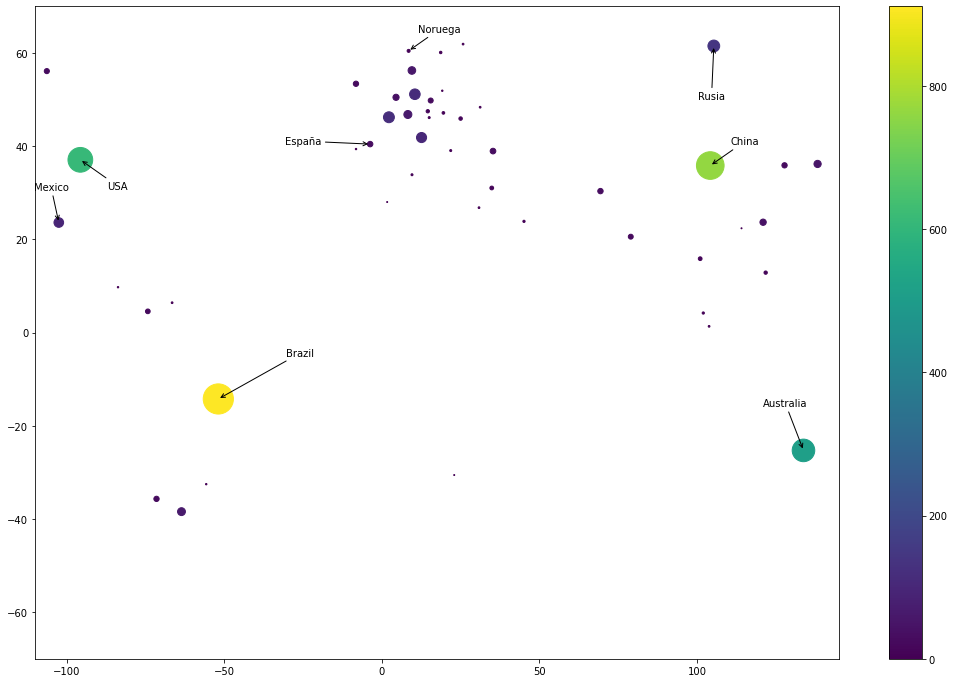

In [264]:
# Se procede a graficar los puntos en un mapa carteciano mediante el paquete matplotlib.pyplot

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(pais_long, pais_lat, s = pais_count, c= pais_count)
plt.colorbar()
plt.xlim(-110,145) # Las dimensiones del plano dependen de las listas de coordenadas.
plt.ylim(-70, 70)
# Se añaden algunos paises como referencia y se marcan los que tienen más relevancia.
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-87.183406, 30.831239), arrowprops = ard)
plt.annotate('Rusia', xy = (105.318756, 61.52401), 
               xytext = (100.318756, 50.016521), arrowprops= ard)
plt.annotate('Brazil', xy = (-51.92528, -14.235004), 
               xytext = (-30.318756, -05.016521), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (120.921327, -15.759275), arrowprops= ard)
plt.annotate('Mexico', xy = (-102.552784, 23.634501), 
               xytext = (-110.552784, 30.634501), arrowprops= ard)
plt.annotate('España', xy = (-3.74922, 40.463667), 
               xytext = (-30.74922, 40.463667), arrowprops= ard)
plt.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (110.510093, 40.339852), arrowprops= ard)
plt.annotate('Noruega', xy = (8.468946, 60.472024), 
               xytext = (11.468946, 64.472024), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()

In [223]:
clear